Load plot the data:

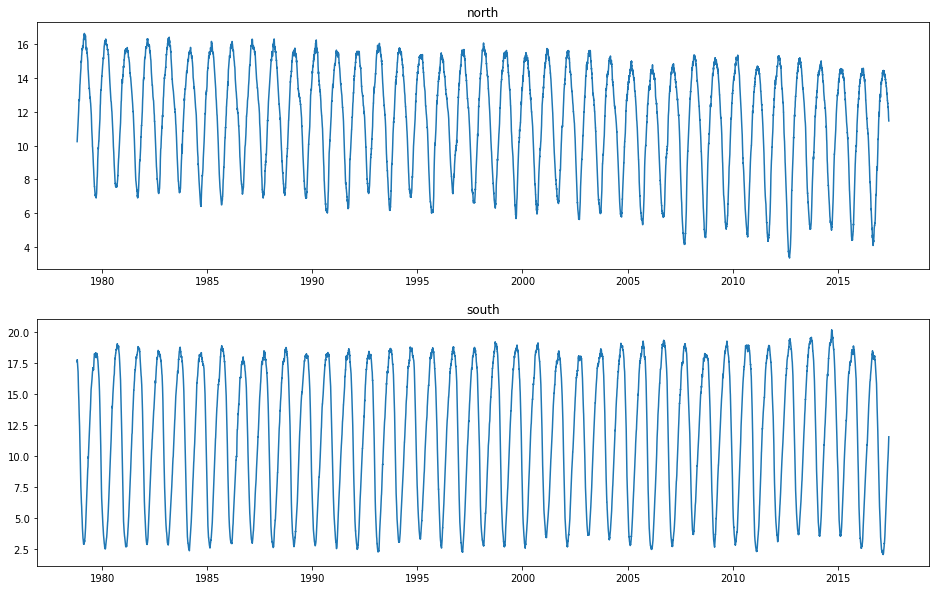

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date, datetime

# load the data
data = pd.read_csv('data/seaice.csv').values

# the first half is for northern sea ice extent, the second for the southern
N = int(data.shape[0] / 2)
extent_north = data[:N, 3]
extent_south = data[N:, 3]

# parse the dates into a list of datetime.date objects
dates = [0]*N
for i in range(N):
    year = int(data[i, 0])
    month = int(data[i, 1])
    day = int(data[i, 2])
    dates[i] = date(year, month, day)
dates = sorted(dates)

# plot the data
plt.figure(1, figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(dates, extent_north)
plt.title('north')
plt.subplot(2, 1, 2)
plt.title('south')
plt.plot(dates, extent_south)
plt.show()

Take the annual mean extent:

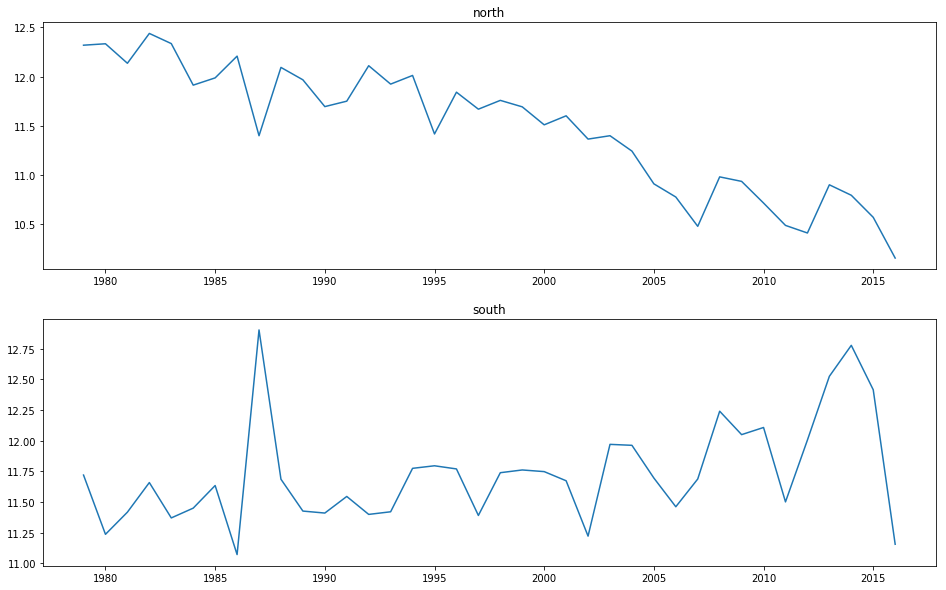

In [17]:
# calculate the average extent for each year
annual_means_north = [0]*40
annual_means_south = [0]*40
daycounts = [0]*40
current_year = 1978
i = 0
for year_index in range(40): # 1978 - 2017 = 40 years
    extent_sum_north = 0
    extent_sum_south = 0
    daycount = 0
    while(True):
        if(current_year == data[i, 0]):
            extent_sum_north += extent_north[i]
            extent_sum_south += extent_south[i]
            daycount += 1
            i += 1
        else:
            annual_means_north[year_index] = extent_sum_north / daycount
            annual_means_south[year_index] = extent_sum_south / daycount
            daycounts[year_index] = daycount
            current_year += 1
            break

# plot the average
plt.figure(1, figsize=(16, 10))
plt.subplot(2, 1, 1)
# omit first and last year because they are not whole
plt.plot(np.arange(1979, 2017), annual_means_north[1:-1]) 
plt.title('north')
plt.subplot(2, 1, 2)
plt.title('south')
plt.plot(np.arange(1979, 2017), annual_means_south[1:-1])
plt.show()

The numbers of days is smaller for years before 1988. This might skew the results in one way or another. Note year 1987, the extent seems too low in north and too high in south.

In [25]:
print(daycounts)

[34, 182, 183, 183, 182, 183, 183, 182, 183, 220, 354, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 158]
